# Activation functions

This workbook shows the various typical activation functions used in neural networks. It's puprose is to bring some non-linearity in the perceptron. The simplist is the sigmoid and assures the output of the perceptron is never more than 1. Both the function and the gradient are symmetrical around 0. The gradient is rather small compared with function, which means that the error correcting back propagation stage will take smaller steps.

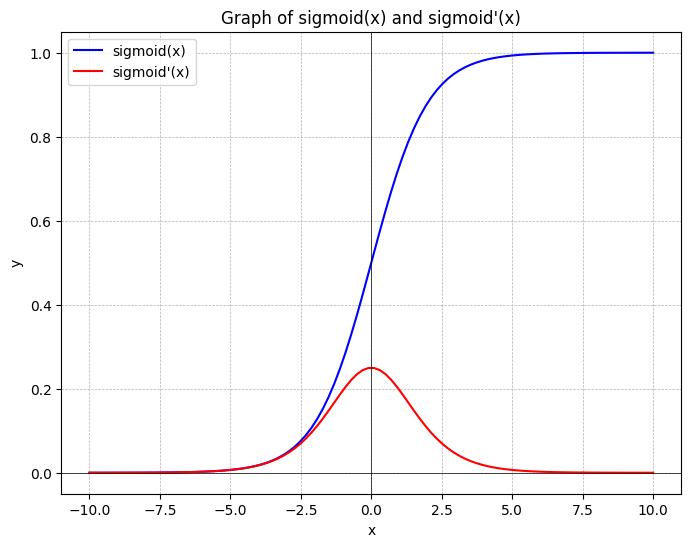

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function 
def sigmoid(x): 
    return 1 / (1 + np.exp(-x)) 

# Define the derivative of the sigmoid function 
def sigmoid_prime(x): 
    sig = sigmoid(x) 
    return sig * (1 - sig)



# Define the x range
x = np.linspace(-10, 10, 100)

# Calculate the GELU values
y_sigmoid = sigmoid(x)
y_sigmoid_prime = sigmoid_prime(x)

markers_on=np.array([0, 0.25, 0.5, 0.75])
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y_sigmoid, label='sigmoid(x)', color='blue')
plt.plot(x, y_sigmoid_prime, label='sigmoid\'(x)', color='red')
plt.title('Graph of sigmoid(x) and sigmoid\'(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

A function that provides a simlar behaviour, but somewhat more aggressive is tanh. Its range is between [-1, 1], but its gradient is steeper.

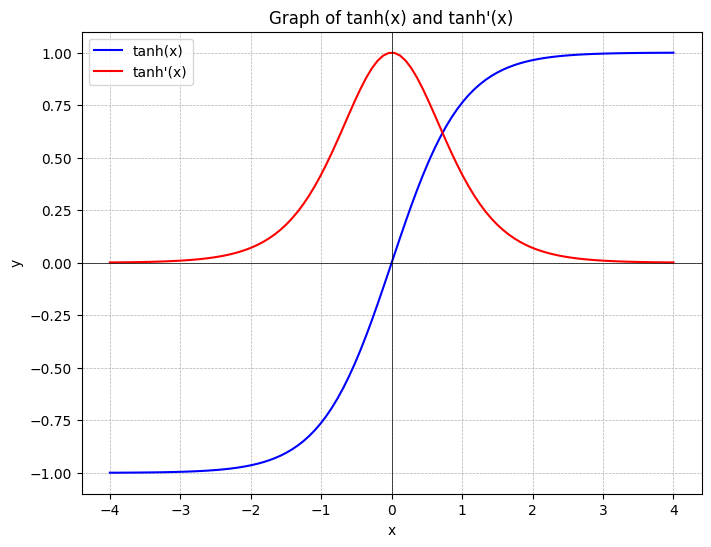

In [35]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Define the x range
x = np.linspace(-4, 4, 100)

# Calculate the tanh values
def tanh_simple(x):
    t = (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))
    return t

y = np.tanh(x)
#y = np.array([tanh_simple(i) for i in x])
y_prime = 1-np.tanh(x)**2

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='tanh(x)', color='blue')
plt.plot(x, y_prime, label='tanh\'(x)', color='red')
plt.title('Graph of tanh(x) and tanh\'(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

Now let's plot a well known function, the GELU. It has however a fairly complex gradient.

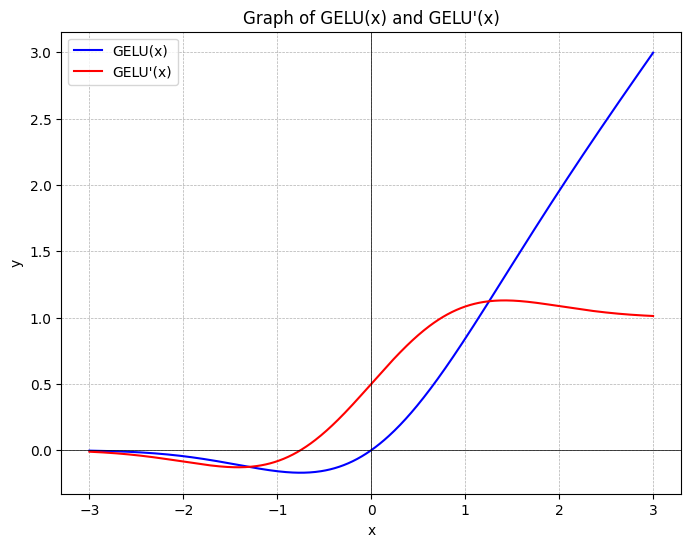

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define the GELU function
# def gelu(x):
#     return 0.5 * x * (1 + scipy.special.erf(x / np.sqrt(2)))

# Define the GELU function without using scipy
def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))

def gelu_prime(x):
    sqrt_2_pi = np.sqrt(2 / np.pi) 
    tanh_term = np.tanh(sqrt_2_pi * (x + 0.044715 * np.power(x, 3))) 
    derivative_tanh_term = (1 - np.power(tanh_term, 2)) * sqrt_2_pi * (1 + 3 * 0.044715 * np.power(x, 2)) 
    return 0.5 * (1 + tanh_term + x * derivative_tanh_term)


# Define the x range
x = np.linspace(-3, 3, 500)

# Calculate the GELU values
y_gelu = gelu(x)
y_gelu_prime = gelu_prime(x)

markers_on=np.array([0, 0.25, 0.5, 0.75])
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y_gelu, label='GELU(x)', color='blue')
plt.plot(x, y_gelu_prime, label='GELU\'(x)', color='red')
plt.title('Graph of GELU(x) and GELU\'(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


Provide an overview of a set of well known functions

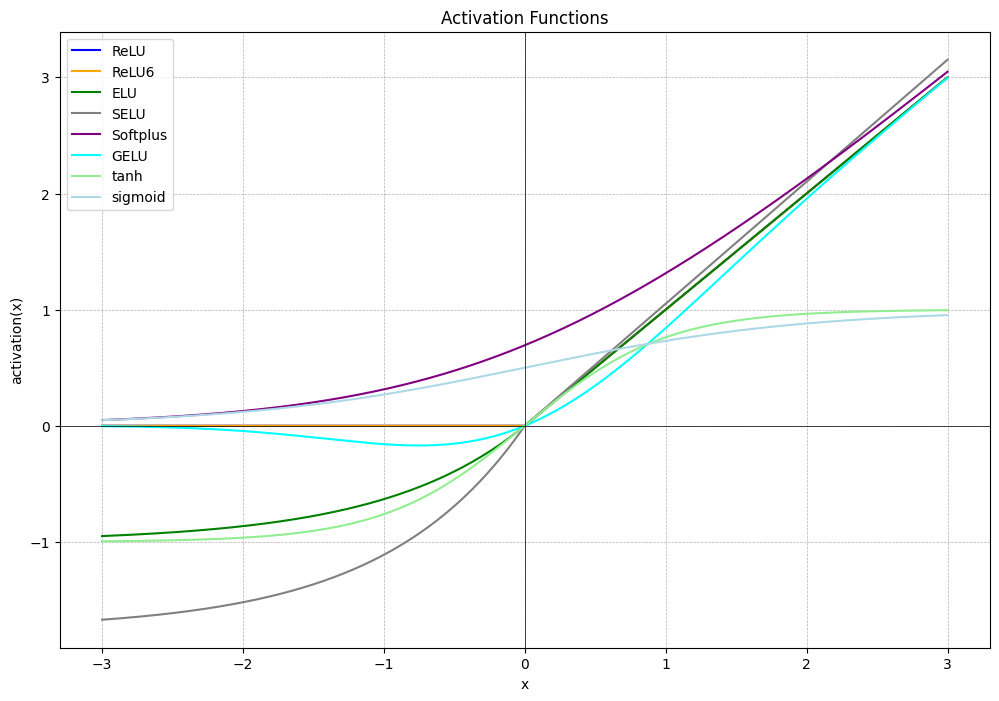

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation functions
def relu(x):
    return np.maximum(0, x)

def relu6(x):
    return np.minimum(np.maximum(0, x), 6)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def selu(x, lambda_=1.0507, alpha=1.67326):
    return lambda_ * np.where(x > 0, x, alpha * (np.exp(x) - 1))

def softplus(x):
    return np.log(1 + np.exp(x))

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))

def sigmoid(x): 
    return 1 / (1 + np.exp(-x)) 

# Define the x range
x = np.linspace(-3, 3, 500)

# Calculate the activation values
y_relu = relu(x)
y_relu6 = relu6(x)
y_elu = elu(x)
y_selu = selu(x)
y_softplus = softplus(x)
y_gelu = gelu(x)
y_tanh = np.tanh(x)
y_sigmoid = sigmoid(x)

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(x, y_relu, label='ReLU', color='blue')
plt.plot(x, y_relu6, label='ReLU6', color='orange')
plt.plot(x, y_elu, label='ELU', color='green')
plt.plot(x, y_selu, label='SELU', color='grey')
plt.plot(x, y_softplus, label='Softplus', color='purple')
plt.plot(x, y_gelu, label='GELU', color='cyan')
plt.plot(x, y_tanh, label='tanh', color='lightgreen')
plt.plot(x, y_sigmoid, label='sigmoid', color='lightblue')
plt.title('Activation Functions')
plt.xlabel('x')
plt.ylabel('activation(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

